## 使用Pandas 讀取客戶流失數據

In [1]:
import pandas
df = pandas.read_csv('customer_churn.csv', index_col=0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 數據預處理

In [2]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [3]:
# 取得第三欄以後的資訊
# df[列,欄]
df = df.ix[ : , 3: ]

In [4]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
## lambda
def square(x):
    return x * x
square(2)

square2 = lambda x: x * x
square2(3)

9

In [6]:
cat_var = ['international_plan', 'voice_mail_plan', 'churn' ]
for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [7]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
X = df.ix[:,:-1]
y = df.ix[:,-1]

## 建立訓練資料與測試資料集

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

## 建立決策樹模型

In [10]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(max_depth=3)
clf1.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
tree.export_graphviz(clf1, 'tree.dot')
#dot -Tpng tree.dot -Otree.png

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var', 'square']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


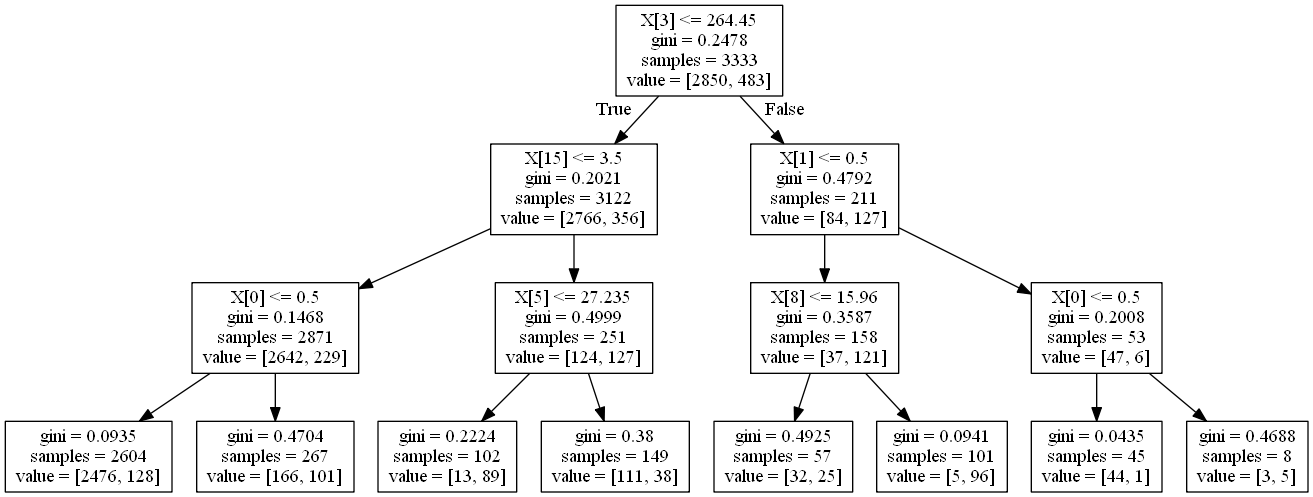

In [13]:
%pylab inline
from IPython.display import Image
Image('tree.png')

In [15]:
X.columns[clf1.feature_importances_.argsort()[::-1]]

Index(['total_day_minutes', 'number_customer_service_calls',
       'total_day_charge', 'international_plan', 'number_vmail_messages',
       'total_eve_charge', 'total_night_calls', 'total_intl_charge',
       'total_intl_calls', 'total_intl_minutes', 'total_night_charge',
       'total_night_minutes', 'total_eve_calls', 'total_eve_minutes',
       'total_day_calls', 'voice_mail_plan'],
      dtype='object')

## 建立邏輯式迴歸

In [16]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 建立 SVM

In [24]:
from sklearn.svm import SVC
clf3 = SVC(probability=True, kernel='linear', max_iter = 10000)
clf3.fit(train_X,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=10000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 產生 Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## 產生預測結果

In [26]:
predicted1 = clf1.predict(test_X)
predicted2 = clf2.predict(test_X)
predicted3 = clf3.predict(test_X)
predicted4 = clf4.predict(test_X)

## 產生 Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y, predicted1)
m

array([[924,  26],
       [ 91,  59]])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted1))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       950
          1       0.69      0.39      0.50       150

avg / total       0.88      0.89      0.88      1100



## 使用ROC Curve 比較不同模型

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


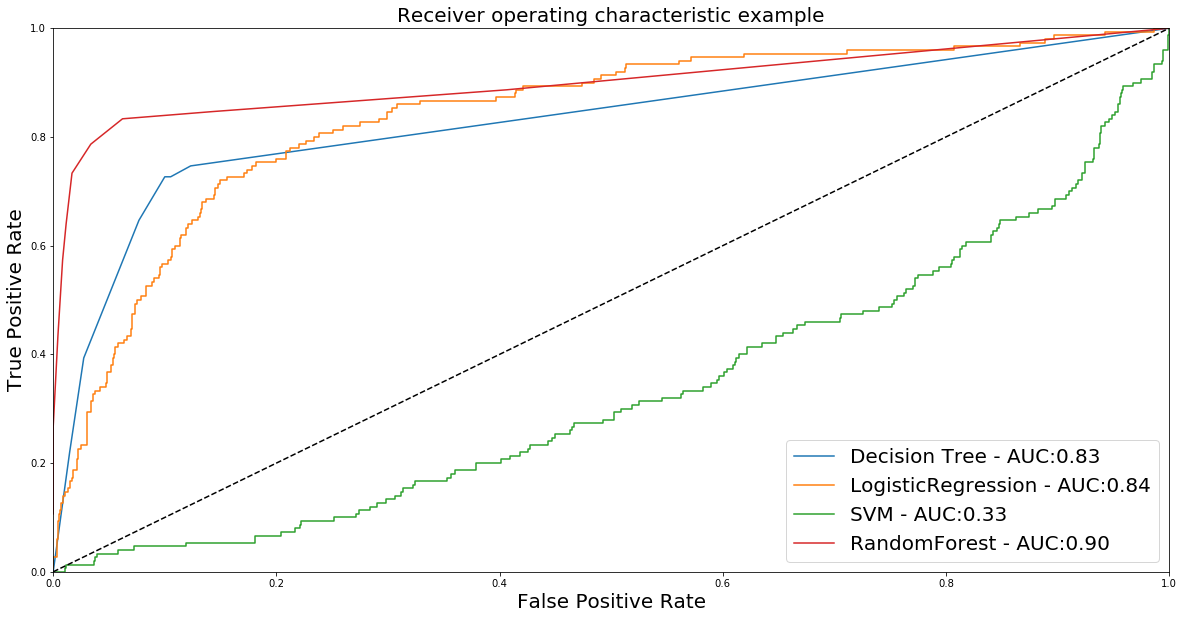

In [29]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'LogisticRegression', 'SVM', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [61]:
from sklearn.metrics import roc_curve, auc

ary = []
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'LogisticRegression', 'SVM', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    ary.extend([[title, f, t] for f,t in zip(fpr,tpr)])
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [65]:
df2 = pandas.DataFrame(ary)
df2.columns = ['Model', 'FPR', 'TPR']
df2.to_excel('model_comparison.xlsx')

## 表列重要特徵

In [33]:
a = [2,6,4,8,1,3,5]
a.sort()
a

[1, 2, 3, 4, 5, 6, 8]

In [37]:
import numpy as np
a = [2,6,4,8,1,3,5]
b = np.array(a)
b[b.argsort()[::-1]]

array([8, 6, 5, 4, 3, 2, 1])

In [43]:
X.columns[clf4.feature_importances_.argsort()[::-1]]

Index(['total_day_charge', 'total_day_minutes',
       'number_customer_service_calls', 'total_eve_charge',
       'total_eve_minutes', 'international_plan', 'total_intl_calls',
       'number_vmail_messages', 'total_day_calls', 'total_intl_charge',
       'total_night_charge', 'total_intl_minutes', 'total_night_minutes',
       'total_night_calls', 'total_eve_calls', 'voice_mail_plan'],
      dtype='object')

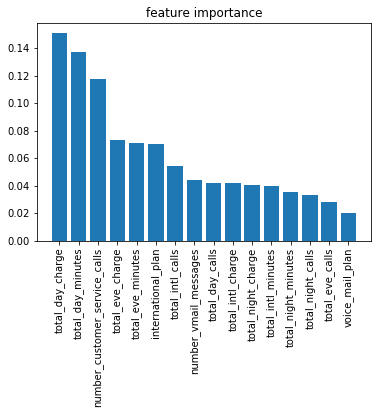

In [50]:
import matplotlib.pyplot as plt
importance = clf4.feature_importances_
plt.title('feature importance')
plt.bar(range(0, len(X.columns)), clf4.feature_importances_[clf4.feature_importances_.argsort()[::-1]])
plt.xticks(range(0, len(X.columns)), X.columns[clf4.feature_importances_.argsort()[::-1]], rotation=90)
plt.show()

## 建立 Dummy Variable (選項)

In [8]:
len(df['state'].unique())

51

In [10]:
import pandas
dummies = pandas.get_dummies(df['state'])
del dummies['AK']

In [13]:
dummies.columns

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [15]:
df2 = pandas.concat([df, dummies], axis = 1)
df2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
